In [3]:
import numpy as np
import importlib 
import src.flow_ot as flow_ot
import matplotlib.pyplot as plt

Centers: [[-1.65955991  4.40648987]
 [-9.9977125  -3.95334855]
 [-7.06488218 -8.1532281 ]]


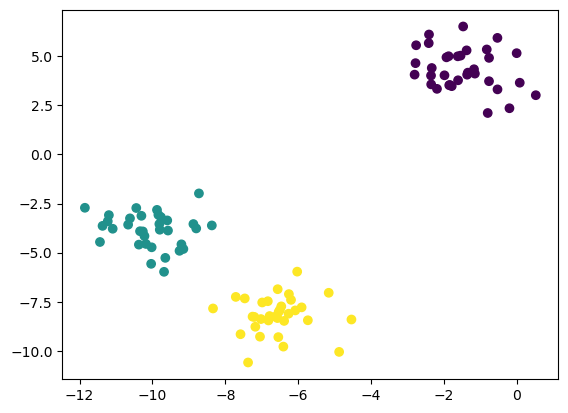

In [4]:
# Experimental set-up, generate data points X from a mixture of Gaussians. 
# We will use the first two dimensions of X as the observed data points and
# the last two dimensions as the hidden factors.
from sklearn.datasets import make_blobs
X, z, centers = make_blobs(n_samples=100, centers=3, n_features=2, random_state=1, return_centers=True)
z = z.reshape(100, 1)
plt.scatter(X[:, 0], X[:, 1], c=z)
print("Centers:", centers)

In [18]:
# Apply the flow-based OT algorithm to compute the barycenter and plot the results. 
# We will use the first two dimensions of X as the observed data points and
# the last two dimensions as the hidden factors.
importlib.reload(flow_ot)

# compute the barycenter
y_init = np.random.randn(X.shape[0], X.shape[1])
y = flow_ot.compute_barycenter(X, z, y_init, lam=0.1, barycenter_cost_grad=flow_ot.gaussian_kernel_kl_grad, verbose=2)

Iteration 100: gradient norm = 34.14583552936929
Iteration 200: gradient norm = 12.525237006201696
Iteration 300: gradient norm = 4.589509114655224
Iteration 400: gradient norm = 1.6811748165242733
Iteration 500: gradient norm = 0.6157718493442967
Iteration 600: gradient norm = 0.22553522939658363
Iteration 700: gradient norm = 0.0826048189309862
Iteration 800: gradient norm = 0.030254907479320664
Iteration 900: gradient norm = 0.011081198764115703
Iteration 1000: gradient norm = 0.004058620431471324
Final gradient norm = 0.004058620431471324
Number of iterations = 1000


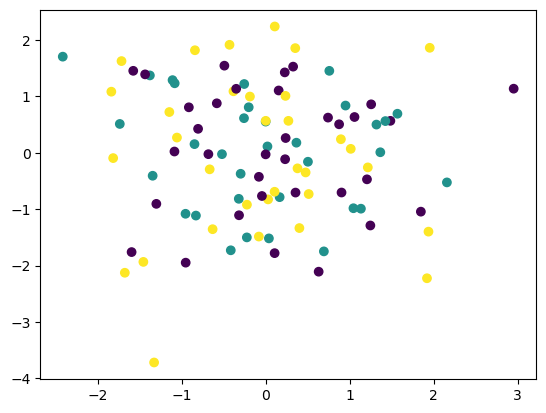

In [19]:
plt.scatter(y_init[:, 0], y_init[:, 1], c=z)

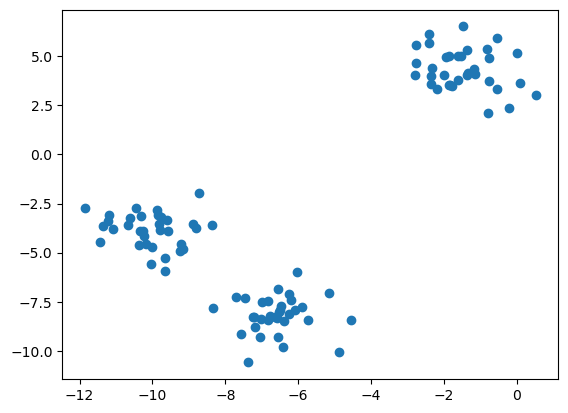

In [20]:
# plot the barycenter
plt.scatter(y[:, 0], y[:, 1])